In [22]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Cargamos la data 

El dataset Fashion-MNIST cotiene 60,00 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

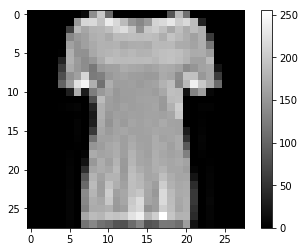

In [25]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [26]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

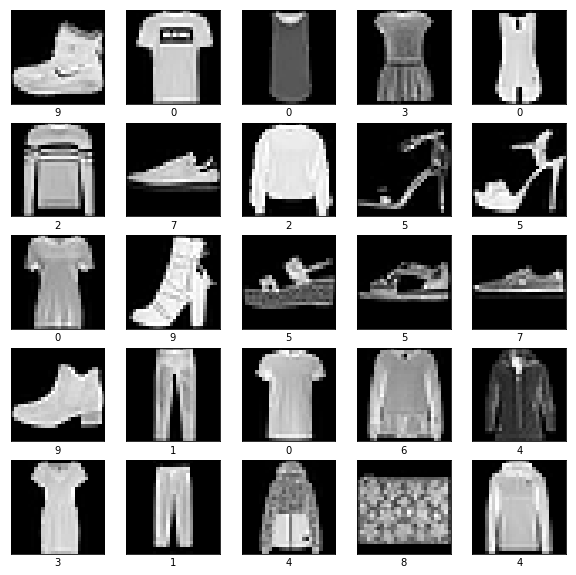

In [27]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

# Tarea

Para esta tarea se deben utilizar únicamente 3 clases, se puede escoger cualquiera de las 10 disponibles en el data set, por lo que hay que filtrar las clases elegidas en los arreglos:
- train_images
- train_labels
- test_images
- test_labels

El objetivo de la tarea es comparar la diferencia al aplicar feature scale/normalization y las features sin ninguna transformación y comparar el efecto de el scaling/normalización sobre el entrenamiento con regresión logística.
- Se debe crear un diccionario con el valor numérico de las labels y el texto correspondiente para poder relacionar el valor numérico con el valor descriptivo/textual.
- Aplicar regresión logística con entropía cruzada como función de costo, crear una función que recibe de entrada un tensor x y predice la clase(utilizar el diccionario para mostrar el texto perteneciente al label).
- Adicional a el costo(por entropía cruzada) en el grafo se debe agregar un nodo que calcule el acurracy(comparando el valor real vs el estimado por el modelo).
- El accuracy y el costo deben ser agregados a tensorboard(agregar screenshots al notebook)
- Se debe agregar al notebook un screenshot del grafo/grafos de tensorboard, simplificando(usando names y name_scope como visto en clase).
- Todo lo anterior se debe hacer tanto para datos crudos, como para datos transformados con (normalización y escalado)
- Basado en los ejemplos de visualización de imagenes en el notebook ,crear una función que reciba de entrada el tensor que representa a una imagen, grafique esta imagen poniendo como título el nombre de la prenda con mayor probabilidad.
- Utilizar la función anterior para mostrar una muestra aleatoria de 5 imágenes(y la predicción probabilistica de la prenda)
- Comparar con tensorboard las curvas de aprendizaje del entrenamiento con datos crudos vs datos transformados, y los 2 grafos y concluir/opinar al respecto usando markdown(agregando screenshots)
- Utilizar mini batch gradient descent con batch size de 32

In [28]:
#Con esto podemos ver las dimensiones de los arreglos.
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
#Se le cambió la forma al arreglo train_images de (60000,28,28) a la forma (60000,784) para una futura manipulación.
#También se le hizo reshape a test_images de (10000, 28, 28) a la forma (10000, 784)
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [30]:
#Conocemos las dimensiones de train_labels y test_labels
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [31]:
#Filtramo el train_labels y el test_labels con las 3 catergorías en las que estamos interesados.
conditions = (train_labels == 1) | (train_labels == 2) | (train_labels == 7)
conditionsi = (test_labels == 1) | (test_labels == 2) | (test_labels == 7)
print(conditions)
print(conditionsi)

[False False False ... False False False]
[False  True  True ... False  True False]


In [32]:
#Hacemos indexing en train_images y en test_images para seleccionar únicamente las filas que cumplan con la 
#condición anteriormente establecida.
train_images_filtrado = train_images[conditions]
test_images_filtrado = test_images[conditionsi]
print("Figura de train_images_filtrado:",train_images_filtrado.shape)
print("Dimensión de train_images_filtrado:",train_images_filtrado.ndim)
print("Figura de test_images_filtrado:",test_images_filtrado.shape)
print("Dimensión de test_images_filtrado:",test_images_filtrado.ndim)

Figura de train_images_filtrado: (18000, 784)
Dimensión de train_images_filtrado: 2
Figura de test_images_filtrado: (3000, 784)
Dimensión de test_images_filtrado: 2


In [33]:
#Hacemos indexing en train_labeles para seleccionar únicamente las filas que cumplan con la condición anteriormente
#establecida.
train_labels_filtrado = train_labels[conditions]
print("Figura de train_labels_filtrado:", train_labels_filtrado.shape)
print("Dimensión de train_labels_filtrado:",train_labels_filtrado.ndim)
test_labels_filtrado = test_labels[conditionsi]
print("Figura de test_labels_filtrado:",test_labels_filtrado.shape)
print("Dimensión de test_labels_filtrado:", test_labels_filtrado.ndim)

Figura de train_labels_filtrado: (18000,)
Dimensión de train_labels_filtrado: 1
Figura de test_labels_filtrado: (3000,)
Dimensión de test_labels_filtrado: 1


In [44]:
x_train = train_images_filtrado.reshape(18000, 784) / 255
x_test = test_images_filtrado.reshape(3000, 784) / 255
print("Figura de x_train:",x_train.shape)
print("Dimensión de x_train:",x_train.ndim)
print("Figura de x_test:",x_test.shape)
print("Dimensión de x_test:",x_test.ndim)

Figura de x_train: (18000, 784)
Dimensión de x_train: 2
Figura de x_test: (3000, 784)
Dimensión de x_test: 2


In [59]:
grafoonehot = tf.Graph()
with grafoonehot.as_default():

#Definimos una constante con el vector de entrenamiento de las prendas de ropa con las 3 clases que seleccioné. Las clases
#seleccionadas fueron las clases 1, 2 y 7.
    etiquetas_g_1 = tf.constant(train_labels_filtrado)
    
#Con el siguiente código se unifican los tipos de clases (1,2 y 7) y se genera un vector de tamaño 18,000 con los índices
#de las clases 1, 2 y 7 dentro del vector original.
    u, indices = tf.unique(etiquetas_g_1)
    
#Con el siguiente código se hace one hot encoding para las tres clases.
    ohe = tf.one_hot(indices, depth = 3)

In [91]:
with tf.Session(graph = grafoonehot) as sess1hot:
    a,b,one_hot_encoding_y = sess1hot.run([u, indices, ohe])
    print(a)
    print(b)
#Aquí comprobamos que se hay cumplido el one hot encoding.
    print(one_hot_encoding_y[:10])
    print(one_hot_encoding_y.shape)

[2 7 1]
[0 1 0 ... 1 0 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(18000, 3)


In [92]:
grafoonehoti = tf.Graph()
with grafoonehoti.as_default():

#Definimos una constante con el vector de entrenamiento de las prendas de ropa con las 3 clases que seleccioné. Las clases
#seleccionadas fueron las clases 1, 2 y 7.
    etiquetas_g_2 = tf.constant(test_labels_filtrado)
    
#Con el siguiente código se unifican los tipos de clases (1,2 y 7) y se genera un vector de tamaño 18,000 con los índices
#de las clases 1, 2 y 7 dentro del vector original.
    v, index = tf.unique(etiquetas_g_2)
    
#Con el siguiente código se hace one hot encoding para las tres clases.
    unohe = tf.one_hot(index, depth = 3)

In [93]:
with tf.Session(graph = grafoonehoti) as sess2hot:
    c,d,one_hot_encoding_ytest = sess2hot.run([v, index, unohe])
    print(c)
    print(d)
#Aquí comprobamos que se hay cumplido el one hot encoding.
    print(one_hot_encoding_ytest[:10])
    print(one_hot_encoding_ytest.shape)

[2 1 7]
[0 1 1 ... 1 1 1]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(3000, 3)


In [97]:
learning_rate = 0.001
epochs = 10
batch_size = 32
batches = int(x_train.shape[0] / batch_size)

In [98]:
grafomodel = tf.Graph()
with grafomodel.as_default():
    
#Vamos a definir nuestros datos de entrenamiento como placeholder. Nuestra X son las imágenes con una figura de (18000,784).
#La X será nuestro objeto llamado "x_train". Este objeto ya está normalizado.
#La Y será nuestra matriz con el one hot encoding ya realizado. Este objeto tiene una forma de (18000,3).
#La Y será nuestro objeto llamado "one_hot_encoding_y".

    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None,3])

#Aquí definimos los parámetros entrenables W y b.
    W = tf.Variable(np.zeros([784,3]).astype(np.float32))
    b = tf.Variable(np.zeros([3]).astype(np.float32))
    
#Aquí definimos la hipótesis.
    pred = tf.nn.softmax(tf.add(tf.matmul(X,W),b))
    
#Aquí definimos la función de costo.
    costo = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
    
#Aquío definimos el algoritmo de aprendizaje. Utilizaremos Gradient Descente para que encuentre un mínimo local.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(costo)

epoch: 0 cost=0.1259
epoch: 1 cost=0.2181
epoch: 2 cost=0.1595
epoch: 3 cost=0.0618
epoch: 4 cost=0.1059
epoch: 5 cost=0.0751
epoch: 6 cost=0.0612
epoch: 7 cost=0.0377
epoch: 8 cost=0.0482
epoch: 9 cost=0.1567
0.328


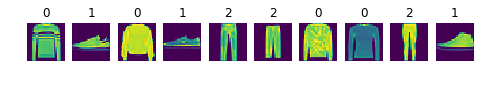

In [99]:
with tf.Session(graph = grafomodel) as sessrl:
    sessrl.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = one_hot_encoding_y[offset: offset + batch_size]
            sessrl.run(optimizer, feed_dict = {X: x, Y: y})
            c = sessrl.run(costo, feed_dict = {X: x, Y: y})
            
        if not epoch % 1:
            print(f'epoch:{epoch:2d} cost={c:.4f}')
    
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: one_hot_encoding_ytest})
    print(acc)
    
    fig, axes = plt.subplots(1, 10, figsize = (8,4))
    for img, ax in zip(x_train[:10], axes):
        guess = np.argmax(sessrl.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28,28)))
        ax.axis("off")